#  Исследование данных об аренде самокатов

**Цель исследования** - проанализировать данные и проверить гипотезы, которые могут помочь бизнесу вырасти.

**Задачи:**
- Проверить гипотезу о том, что тратят ли пользователи с подпиской больше времени на поездки?
- Проверить гипотезу о том, что расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Проверить гипотезу о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**План исследования:**

1. Изучить данные
2. Предобработка данных
3. Исследовательский анализ данных
4. Проверка гипотез
5. Распределение (доп.задание)
6. Сделать общий вывод исследования

**Согласно документации к данным.**

Таблица `users_go` содержит информацию  о пользователях.

- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

Таблица `rides_go` содержит информаицию о поездках пользователей.

- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

Таблица `subscriptions_go` содержит информаицию о подписках пользователей.

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

# Изучение данных.

## Импорт библиотек

In [1]:
import os
import warnings

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats as st # Импорт scipy для проверки гипотез
from math import sqrt

## Функции

In [2]:
def ttest(result):
    
    '''
    Функция принимает результат t-теста и
    сравнивает его значение с нашим уровнем статистической значимости
    и выводит значение p-value и решение о гипотезе
    
    '''
    
    alpha = 0.05
    
    print('p-значение:', result.pvalue)
    
    if (result.pvalue < alpha):
        return 'Отвергаем нулевую гипотезу'
    else:
        return 'Не отвергаем нулевую гипотезу'

In [3]:
def linspace(start, stop, num):
    
    '''
    Функция помогает построить
    ось Х
    '''
    
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

## Загрузка данных

Прочитаем файлы `users_go.csv`, `rides_go.csv` и `subscriptions.csv` и сохраним их в переменных `users`, `rides` и `subscriptions`.

In [4]:
pth1 = r"C:\Users\stepa\Downloads\users_go.csv"
pth2 = r"C:\Users\stepa\Downloads\rides_go.csv"
pth3 = r"C:\Users\stepa\Downloads\subscriptions_go.csv"

In [5]:
if os.path.exists(pth1):
    users = pd.read_csv(pth1)
else:
    print('Ошибка')

In [6]:
if os.path.exists(pth2):
    rides = pd.read_csv(pth2)
else:
    print('Ошибка')

In [7]:
if os.path.exists(pth3):
    subscriptions = pd.read_csv(pth3)
else:
    print('Ошибка')

Выведим первые 10 строк таблиц `users`, `rides` и `subscriptions`.

In [8]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [9]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [10]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Общая информация о данных таблиц `users`, `rides` и `subscriptions`.

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Рассмотрим полученную информацию подробнее.

Всего в таблице 5 столбцов, тип данных - `int`(2), `object`(3). 
Название столбцов соотвествует стилю. Количестов значений в столбцах одинаковое, а значит пропусков нет.

In [12]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Рассмотрим полученную информацию подробнее.

Всего в таблице 4 столбца, тип данных - `int`(1), `object`(1) и `float`(2)

Название столбцов соотвествует стилю. Количестов значений в столбцах одинаковое, а значит пропусков нет.
Стобец `date` имеет тип данных `object` необходимо привести его к типу данных `datetime`.

In [13]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Всего в таблице 4 столбца, тип данных - `int`(3) и `object`(1). Название столбцов соотвествует стилю. Количестов значений в столбцах одинаковое, а значит пропусков нет.

**Вывод:**

Каждая сторка таблиц содержит информацию о пользователях, о его его поездках и типе подписке. Есть несколько проблем такие, как:
1. Исрпавить тип данных в столбце `date` с `object` на `datetime`;
2. Создать столбец `month` с номером месяца;
3. Следует сделать проверку на явные дубликаты;
4. Стоит проверить столбец `name` на неявные дубликаты, так в именах могли написать е или ё;
5. Также в столбце `name` могли быть сокрщаенное написание имен, например, Влад - Владислав;
6. Стоит провеить столбце `city` на неявные дубликаты.

# Предобработка данных.

## Изменение типов данных

Изменим тип данных в столбце `date` с `object` на `datetime` в таблице `rides`.

In [14]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') # Меняем тип данных на datetime

## Работа с явными дубликатами

Сделаем проверку на явные дубликаты во всех таблицах.

In [15]:
users.duplicated().sum() # Проверяем количество явных дубликатов

31

В таблице `users` был найден 31 дубликат, удалим их.

In [16]:
users = users.drop_duplicates().reset_index(drop=True) # Удаляем дубликаты

Еще раз проверим, удалились ли дубликаты.

In [17]:
users.duplicated().sum() # Проверяем количество явных дубликатов

0

Проверим таблицу `rides`.

In [18]:
rides.duplicated().sum() # Проверяем количество явных дубликатов

0

В таблице `rides` явных дубликатов нет.

Проверим таблицу `subscriptions`

In [19]:
subscriptions.duplicated().sum() # Проверяем количество явных дубликатов

0

В таблице `subscriptions` явных дубликатов нет.

## Работа с неявными дубликатами

Предположим, что в именах используется е или ё, то есть проверим столбец `name` в таблице `users`.

In [20]:
users['name'].value_counts() # Считаем количество уникальных значений

name
Анна         22
Мария        22
Александр    17
Дмитрий      17
Никита       16
             ..
Матвей        3
Семен         2
Тихон         1
Радмир        1
Милана        1
Name: count, Length: 194, dtype: int64

Заменим ё на е и еще раз посчитаем уникальные значения

In [21]:
users['name'] = users['name'].str.replace('ё', 'е') # Меняем ё на е

In [22]:
users['name'].value_counts() # Считаем количество уникальных значений

name
Анна         22
Мария        22
Александр    17
Дмитрий      17
Никита       16
             ..
Матвей        3
Семен         2
Тихон         1
Радмир        1
Милана        1
Name: count, Length: 194, dtype: int64

Длина осталась такой же, значит таких дубликатов не было

Теперь проверим уникальные значения столбца `name` и изучим их. Вдург есть одни и теже имена, которые записаны по разному.

In [23]:
users['name'].unique() # Выводим уникальные значения

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

В столбце `name` есть имена Наташа, Влад и Влада, заменим их на Наталия, Владислав и Владислава

In [24]:
users['name'] = (
    users['name']
    .replace('Наташа', 'Наталия')
    .replace('Влад', 'Владислав')
    .replace('Влада', 'Владислава')
)

Теперь проверим написание городов, а значит надо проверить столбец `city` таблицы  `users`.

In [25]:
users['city'].value_counts() # Считаем количество уникальных значений

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

В столбце `city` неявные дубликаты не обнаружены.

## Добавление нового столбца

Создадим новый столбец `month` с номером месяца.

In [26]:
rides['month'] = rides['date'].dt.month # Находим номер месяца

Выясним за какой период у нас данные. Для этого найдем максимальную и минимальную дату в столбце `date`

In [27]:
rides['date'].max(), rides['date'].min()

(Timestamp('2021-12-30 00:00:00'), Timestamp('2021-01-01 00:00:00'))

В данном случае, у нас данные за 2021 год

## Вывод

Вывод:

На данном этапе были сделаны следующие шаги:
    
1. Изменили тип данных в столбце `date` с `object` на `datetime`;
2. Удалили явные дубликаты в столбце `users` в количестве 31;
3. В столбце `users` заменили буквы в именах с ё на е;
4. В столбце `users` были найдены неявные дубликаты:
    
    - Заменили Влад на Владислав
    
    - Заменили Влада на Владислава
    
    - Заменили Наташа на Наталию
    

5. Был проверен столбец `city` на наличие неявных дубликатов - **не обнаружены**.
6. Добавили столбец `month` с номером месяца;
7. Узнали, что данные в нашем распорежение только за 2021 год;

# Исследовательский анализ данных

Изучим общую информацию об пользователях, а именно:
1. частота встречаемости городов;
2. cоотношение пользователей с подпиской и без подписки;
3. возраст пользователей;
4. расстояние, которое пользователь преодолел за одну поездку;
5. продолжительность поездок.

Для этого нам понадобятся таблицы `users` и `rides`

## Частота встречаемости городов

Найдем частоту городов, для это просто посчитаем количество уникальных значений в столбце `city` и сохраним их в переменной `users_city`. Также сделаем сортировку по убыванию.

In [28]:
users_city = users['city'].value_counts().sort_values(ascending=False) # Считаем количество уникальных значений и сортируем

Теперь построим столбчатый график для наглядности

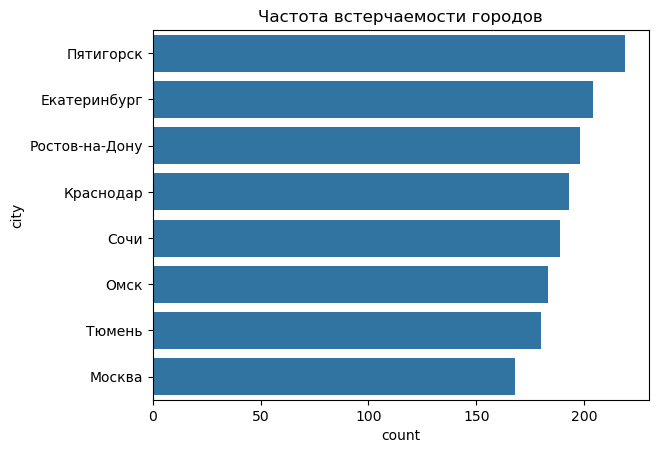

In [29]:
sns.barplot(y=users_city.index, x=users_city)
plt.title('Частота встерчаемости городов');

**Вывод**

Как видно из построенного графика, самый частый город это Пятигорск, менее частый город Москва

## Соотношение пользователей с подпиской и без подписки

Для этого нам понадобится столбец `subscription_type` из таблиц `users` и по этому столбцу построим круговую диаграмму методом `pie`

In [30]:
count_subscrip = users['subscription_type'].value_counts()
count_subscrip

subscription_type
free     835
ultra    699
Name: count, dtype: int64

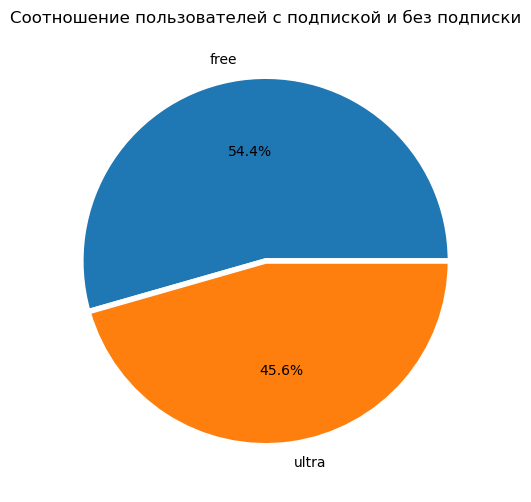

In [31]:
# Cтроим круговую диаграмму
plt.figure(figsize=(10, 6))
plt.pie(count_subscrip.values, 
        labels=count_subscrip.index, 
        wedgeprops={'linewidth':4, 'edgecolor':'white'}, 
        autopct='%.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

**Вывод**

В результате, получается, что людей без подписок больше, а именно их 835 против 699 с подпиской или же 54% против 45%.

## Возраст пользователей

Узнаем люди какого возраста пользуются приложением. Здесь нам необходимо взять таблицу `users` со столбцом `age` и по этим данным построить график.

In [32]:
age_users = users['age'].value_counts() # Считаем количество уникальных значений столбца age

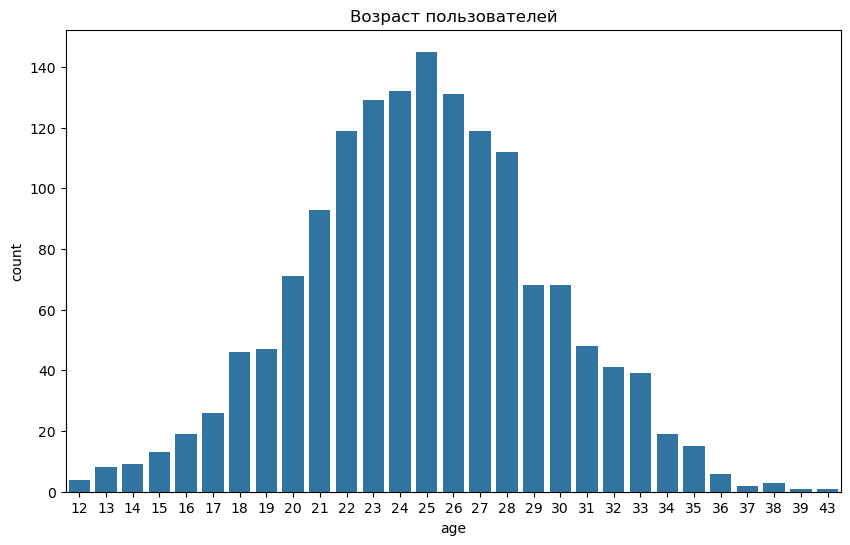

In [33]:
plt.figure(figsize = (10, 6))
sns.countplot(x='age', data=users)
plt.title('Возраст пользователей');

**Вывод**

По графику видно, что больше всего самокаты используют пользователи 25-ти лет.  Также можно сказать, что люди от 20 до 30 лет являются основными пользователями аренды самокатов.

## Расстояние, которое пользователь преодолел за одну поездку

Посмотрим медианное, максимально и минимальное расстояние, которые пользователи преодолевают за одну поездку. Для этого возьмем столбец `distance` из `rides` и создадим сводную таблицу по пользователям. Для того, чтобы более подробно изучить данные.

In [34]:
# Создаем сводную таблицу и записываем ее в переменную users_distance
users_distance = (
    rides
    .pivot_table(index='user_id', 
                 values='distance', 
                 aggfunc=['median', 'max', 'min'], 
                 margins=True)
)

Выводим первые 5 и последние 5 строчек полученной таблицы

In [35]:
users_distance # Выводим значения

,median,max,min
,distance,distance,distance
user_id,,,
1,2806.504429,4409.919140,748.690645
2,3105.086678,4029.116927,923.007439
3,2858.693148,5335.212090,2560.495330
4,3373.276987,4649.488243,724.559572
5,3244.021903,4194.713218,2561.108241
...,...,...,...
1531,2999.913238,4928.408206,375.107762
1532,2615.477834,4602.642357,303.787850


3133 метров столько в среднем пользователи преодолевают за одну поездку, максимальное расстояние 7211, а вот минимальное 85 см, что выглядит аномально, надо его проверить.

проверим есть ли еще значения в таблице `rides` меньше 1.

In [36]:
rides[rides['distance'] < 1] # Смотрим на значения меньше 1

,user_id,distance,duration,date,month
11555,1069,0.855683,10.001902,2021-01-31,1


Удалять данное значение не будем, так как могли быть разные причины по которым получилось такое значение от технических до проблем у самого пользователя.

Построим график по столбцу `distance` таблицы `rides`.

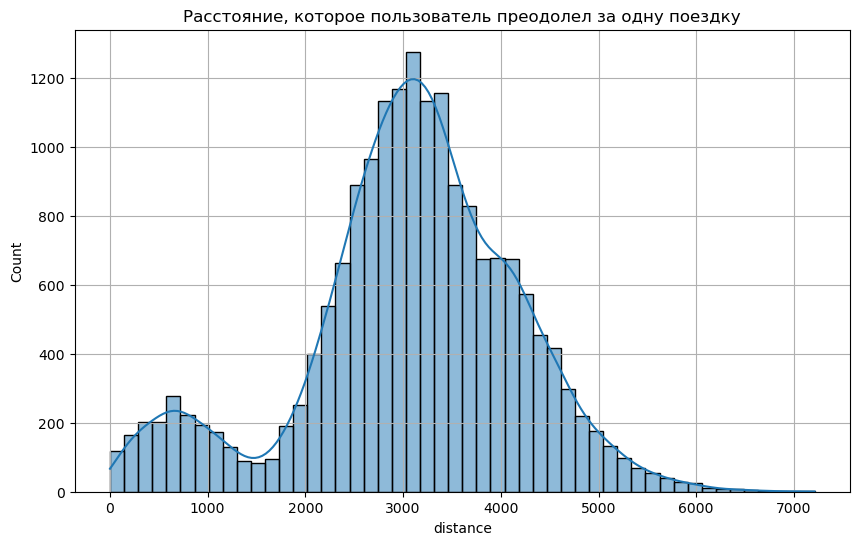

In [37]:
# Строим столбчатый график расстояния
plt.figure(figsize=(10, 6))
plt.grid()
sns.histplot(rides['distance'], kde=True, bins=50)
plt.title('Расстояние, которое пользователь преодолел за одну поездку');

**Вывод**

Как видно по графику, что наиболее часто пользователи проезжают за одну поездку около 3000м, пользователи проезжающих больше 5000м довольно мало. Также заметен небольшой пик в районе 500м это может говорить, о том, что определенная часть пользователей ездит на небольшие расстояние, то есть, например, часто берут самокат для того, чтобы доехать до остановки или магазина.

## Продолжительность поездок

Сделаем тоже самое для продолжительности поездок. Для этого возьмем столбец `duration` из `rides` и создадим сводную таблицу по пользователям и также изучим данные более подробно.

In [38]:
# создаем сводную таблицу и записываем ее в переменную users_duration
users_duration = (
    rides
    .pivot_table(index='user_id', 
                 values='duration', 
                 aggfunc=['median', 'max', 'min'], 
                 margins=True)
)

Выводим первые 5 и последние 5 строчек полученной таблицы.

In [39]:
users_duration # Выводим значения

,median,max,min
,duration,duration,duration
user_id,,,
1,16.233505,26.265803,6.232113
2,18.779128,26.027432,6.914760
3,19.835873,25.848038,12.654443
4,20.723324,35.896929,11.811399
5,14.904990,21.680107,11.087710
...,...,...,...
1531,18.308701,30.428027,5.406654
1532,14.846434,32.013212,7.792490


17.7 минут, столько в среднем пользователи тратят на одну поездку. Максимальное затраченое время 40.8, а минмальное 5 секунд, время выглядит аномальным, стоит его проверить.

Выведем время меньше минуты и изучим данные.

In [40]:
rides[rides['duration'] < 1] # Смотрим на значения меньше 1

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Видно, что таких пользователей много, а еще видно, что эти пользователи проехали большое расстояние, либо же это какой-то технический сбой, либо время записанно в каких-то других единицах, либо пользователи как-то обходят с помощью стороннего софта, чтобы платить меньше. Удалять данные значения не будем, но стоит взять их на вооружение и уточнить.

Построим график по столбцу `duration` таблицы `rides`


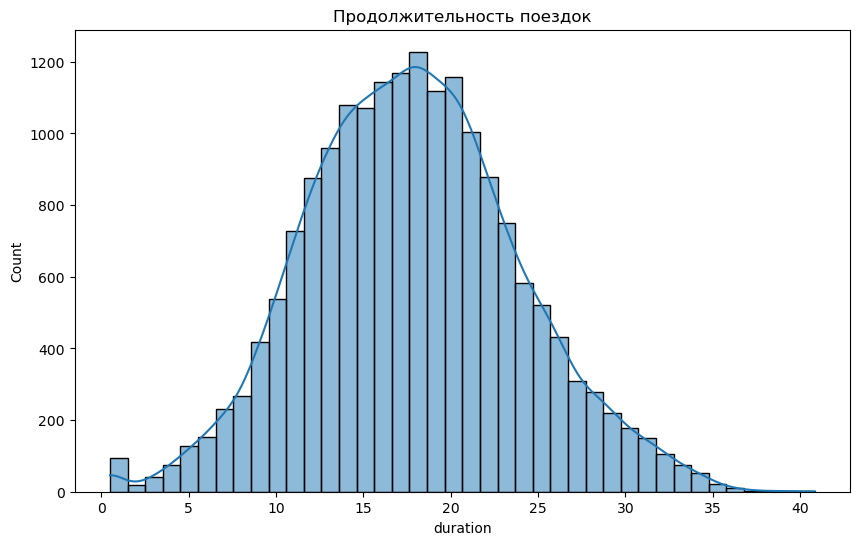

In [41]:
# Строим столбчатый график
plt.figure(figsize=(10, 6))
sns.histplot(rides['duration'], bins=40, kde=True)
plt.title('Продолжительность поездок');

**Вывод**

По графику видно, что данные по продолжительности поездок имеют нормальное распределение. Также можно сказать, что пик приходится примерно на 17 минут, наиболее часто берут самокат на продолжительность от 10 до 27 минут. Можно сказать, что это оптимальное время использование самоката. 

## Объединение данных

Округлим столбец `duration` в большую сторону, это необходимо для дальнейших расчетов. 

In [42]:
rides['duration'] = np.ceil(rides['duration']) # Округляем столбец

Приступим к объединению датафреймов. Сначала объединим таблицы `users` и `rides` по столбцу `user_id` и сохраним все в переменную `information_users`.

In [43]:
information_users = users.merge(rides, on='user_id', how='outer') # Объединяем таблицы users и rides

Теперь объединим с получившимся датафреймом, таблицу `subscriptions` по столбцу `subscription_type`.

In [44]:
# Объединяем датафреймы
information_users = information_users.merge(subscriptions, on='subscription_type', how='outer')

Выведим информацию о получившися датафрейме, чтобы убедится, что все данные перенеслись верно, должно быть 18068 значений в каждом столбце

In [45]:
information_users.info() # Выводим инфомрацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Как видно все данные перенеслись верно.

In [46]:
information_users.head() # Выводим значения таблицы

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


Также создадим два датафрейма с пользователями с подпиской и без для дальнейшего исследования

Выделем пользователей с подпиской и сохраним их в переменную `users_ultra`.

In [47]:
users_ultra = information_users[information_users['subscription_type'] == 'ultra'] 

Проверим, выведя первые 5 строк таблицы

In [48]:
users_ultra.head() # Выводим первые 5 строк таблицы

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


Теперь создадим датафрейм с пользователями без подписки и сохраним в переменную `users_free`.

In [49]:
users_free = information_users[information_users['subscription_type'] == 'free']

In [50]:
users_free.head() # Выводим первые 5 строк таблицы

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


## Изучим пользователей с подпиской и без нее

Проанализируем оба датафрейма на информацию о расстоянии и времени поездок для пользователей обеих категорий (`ultra` и `free`).

### Расстояние пройденное пользователями с подпиской и без нее

Изучим столбец `distance` таблицы `users_ultra` с помощью метода `describe()`

Посмотрим медианное расстояние, которые пользователи c **подпиской** преодолевают за одну поездку. Для этого возьмем столбец `distance` и посмотрим его статистику методом `describe()`

In [51]:
users_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

3148 метров столько в среднем пользователи с **подпиской** преодолевают за одну поездку. Максимальное расстояние, которое преодолевал пользователь с подпиской 5699 метров, а минимальное 244 метра.

Посмотрим медианное, максимальное и минимальное расстояние, которые пользователи **без подписки** преодолевают за одну поездку. Для этого возьмем столбец `distance` из таблицы `users_free` и применим к нему метод `describe()`, который покажет числовую статистику этого столбца.

In [52]:
users_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

3045 метров столько в среднем пользователи **без подписки** преодолевают за одну поездку. Самое большое расстояние, которое проехал пользователь без подписки 7211 метров, а самое минимальное 85см.

Построим график зависимости пользоваетлей (с подпиской и без нее) от расстояния, которое они проезжают 

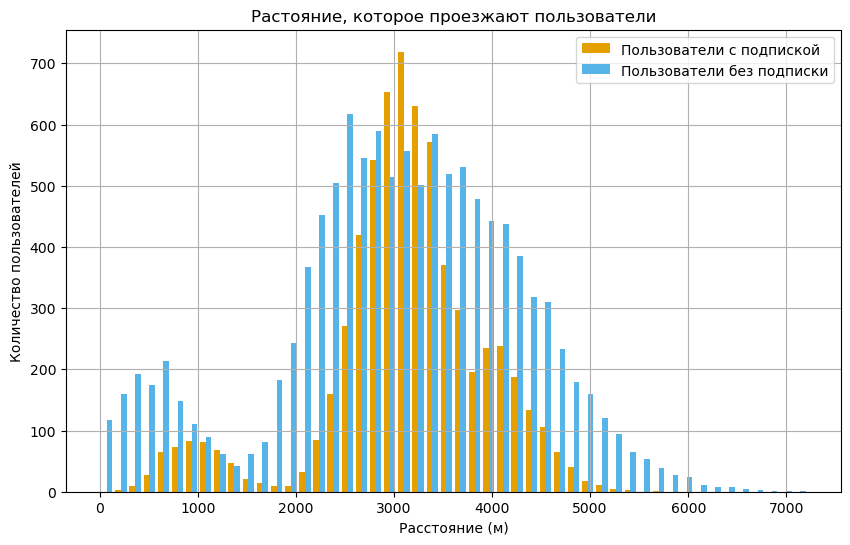

In [53]:
# Выставляем размер графика
plt.figure(figsize=(10, 6))

# Создаем отдельный список для каждой категории
x1 = list(users_ultra['distance'])
x2 = list(users_free['distance'])

# Назначаем цвет и название для каждой категории
colors = ['#E69F00', '#56B4E9']
names = ['Пользователи с подпиской', 'Пользователи без подписки']

# Строим гистограмму, используя список списков
plt.hist([x1, x2], bins = 50,
         color = colors, label=names)

plt.grid()
plt.legend()
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество пользователей')
plt.title('Растояние, которое проезжают пользователи')
plt.show()

**Вывод:**
    
По графику видно, пользователей без подписки больше, чем пользователей с подпиской, но пользователи с подпиской чаще проезжают расстояния примено от 2800м до 3500м. А пользователи без подписки обычно проезжают короткие расстояния, а также расстояния от 3500м и более. Это также можно подтвердить цифрами, которые мы получили ранее, так среднее знчение у пользователей с подпиской получается 3115м против 3045м, минимальное значение 244м против 0.85см, максимальное 5699м против 7211м.
    
Также в целом можно сказать, что пользователи с подпиской обычно берут самокаты для средних по расстоянию поездок.

### Продолжительность заезда пользователей с подпиской и без нее

Сделаем анологичное исследование для продолжительности поездки

Изучим столбец `duration` таблицы `users_ultra` с помощью метода `describe()`

Делаем анологичные действия для пользователей **с подпиской**, чтобы узнать их продолжительность. Для этого возьмем столбец `duration` и посмотрим его статистику методом `describe()`

In [54]:
users_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

19 минут, столько в среднем пользователи **с подпиской** тратят на одну поездку, максимальное время затраченое на поездку 41 минуты, а минимальное 4.

Теперь выведем такую же статистику для пользователей **без подписки**.

In [55]:
users_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

18 минут, столько в среднем пользователи **без подписки** тратят на одну поездку. Самая долгая поездка длиласт 35 минут, а самая короткая 1 минута.

Визуализируем на одном графике пользователей с подпиской и без нее по всем данным столбца `duration`

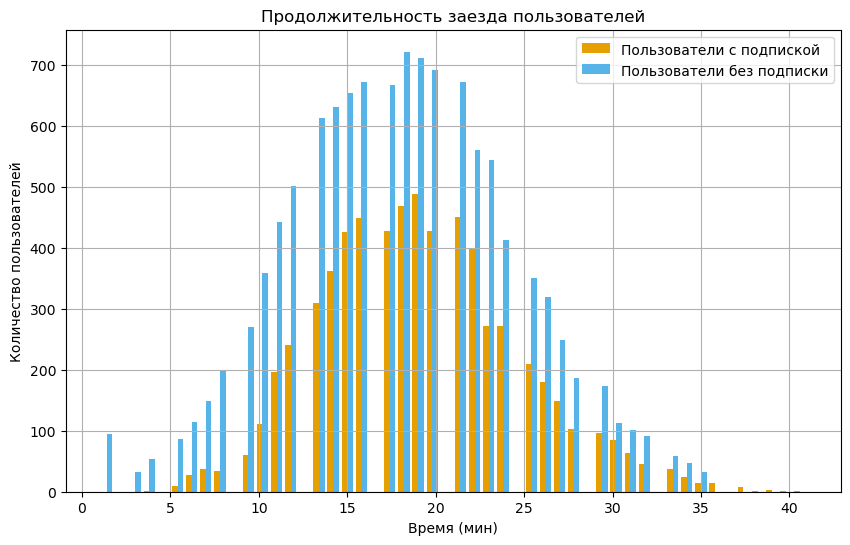

In [56]:
# Выставляем размер графика
plt.figure(figsize=(10, 6))

# Создаем отдельный список для каждой категории
x1 = list(users_ultra['duration'])
x2 = list(users_free['duration'])

# Назначаем цвет и название для каждой категории
colors = ['#E69F00', '#56B4E9']
names = ['Пользователи с подпиской', 'Пользователи без подписки']

# Строим гистограмму, используя список списков
plt.hist([x1, x2], bins = 50,
         color = colors, label=names)

plt.grid()
plt.legend()
plt.xlabel('Время (мин)')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность заезда пользователей')
plt.show()

**Вывод:**
    
В целом пользователи с подпиской тратят столько же времени как и пользователи без подписки, разница только в том, что пользователей без подписки больше. Но есть некоторые исключения в том плане, что пользователи у пользователей с подпиской поездок дольше 35 минут больше (на графике небольшие пики с права). А у пользователей без подписки количество коротких заездов больше, можно заметить это на графике (несколькой небольших пиков слева).

**Вывод**

В результате исследования можно сделать следующие выводы:

Пользователей с подпиской меньше, чем пользователей без нее, но стоит учитывать, что пользователи с подпиской тоже когда-то были без нее, а значит одни и теже люди могут быть в двух категориях. 
    
1. Пользователей без подписки больше, чем пользователей с подпиской
2. Пользователи с подпиской обычно проезжают расстояние от 2800м до 3500м
3. Пользователи без подписки чаще берут самокаты на короткое расстояние, а следовательно и поездки у них обычно короче
4. Пользователи с подпиской чаще проезжают расстояния от 35м и более
5. Продолжительность поездки в целом у пользователей одинаковая

## Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках, то есть найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Для этого сделаем сводную таблицу по всем пользователям, то есть возьмем наш объединенный датафрейм `information_users`.

In [57]:
# Для игнорирования предупреждений
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [58]:
# Создаем сводную агрегированную таблицу и сбрасываем индексы и записываем в переменную agg_rides_users
agg_rides_users = (
    information_users
    .pivot_table(
        index=['user_id', 'month'], 
        values=['distance', 'duration', 'minute_price', 
                'start_ride_price', 'subscription_fee'], 
        aggfunc={'distance': sum, 'duration': [sum, len], 
                 'minute_price':'first', 'start_ride_price': 'first',
                 'subscription_fee': 'first'})
    .reset_index()
)

Переименуем столбцы

In [59]:
# Меняем название столбцов
agg_rides_users.columns = (
    ['user_id','month', 'sum_distance', 'count_rides', 'sum_duration', 
     'minute_price', 'start_ride_price','subscription_fee']
)

Создадим столбец с помесячной выручкой от каждого пользователя для пользователь без подписки получается, что он платит за каждый старт поездки, поэтому нам надо умножить количество поездок на стоимость старта (50 рублей), а также добавить стоимость каждой минуты в этой поездке (8 рублей для пользователей без подписки)

Пользователи подписки не платят за каждый старт поездки, поэтому мы считаем стоимость каждой минуты поездки (6 рублей для пользователей с подпиской) и добавляем к ней сумму подписки (199 рублей)

In [60]:
agg_rides_users['price_mounth'] = (
    agg_rides_users['count_rides'] * agg_rides_users['start_ride_price'] 
    + agg_rides_users['sum_duration'] * agg_rides_users['minute_price'] 
    + agg_rides_users['subscription_fee']
)

#  Проверка гипотез

Необходимо проверить 3 гипотезы:
1. Тратят ли пользователи с подпиской больше времени на поездки?
2. Расстояние одной поездки в `3130` метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает `3130` метров?
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

## Тратят ли пользователи с подпиской больше времени на поездки?

Необходимо сформулировать нулевую гипотезу. Предположим, что **H0** - в среднем пользователи с подпиской тратят столько же времени на поездки, как и пользователи без нее.

Также необходима альтернативная гипотеза: **H1** -  в среднем пользователи с подпиской тратят больше времени на поездки, чем пользователи без нее.

Для проверки отвергаем мы или не отвергаем нулевую гипотезу, была написана функцию `ttest`, которая принмает одно значение результат проверки гипотезы.

Для проверки этой гипотезы нам понадобиться два датафрейма `users_ultra` и `users_free`, в которых хранятся данные о пользователях с подпиской и без нее. Из этих таблиц нам понадобиться столбец `duration`. Для проверки равентсва двух генеральных совокупностей воспользуемся методом `ttest_ind`, так как генеральные совокупности не зависят друг от друга и выборочные средние нормально распределены это условие должно выполнятся благодаря ЦПТ.

Передадим методу два датафрейма, также параметр `equal_var` сделаем равным `False`, так как выборки разных размеров. И так, как наша альтернативаная гипотеза говорит, что пользователи тратят больше, то параметр `alternative` делаем равным `greater`

In [61]:
result_duration = (
    st.ttest_ind(
        users_ultra['duration'], 
        users_free['duration'], 
        equal_var=False, 
        alternative='greater')
)

print('Среднее значение продолжительности поездки пользователей с подпиской', 
      users_ultra['duration'].mean())
print('Среднее значение продолжительности поездки пользователей без подписки', 
      users_free['duration'].mean())

ttest(result_duration)

Среднее значение продолжительности поездки пользователей с подпиской 19.037692307692307
Среднее значение продолжительности поездки пользователей без подписки 17.890992392807746
p-значение: 1.1814679253701353e-36


'Отвергаем нулевую гипотезу'

Полученое значение p-value меньше заданного уровня значимости, поэтому мы отвергаем нулевую гипотезу. Также есть основания, что **пользователи с подпиской трататят больше времени на поездки**

## Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Необходимо также сформировать нулевую и альтернативную гипотезу в нашем случам у нас одностороняя гипотеза:

**H0** - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равняется 3130 метров

**H1** - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров 
- H0: μ = 3130
- H1: μ > 3130

Для проверки односторонней гипотезы из одной генеральной совокупности воспользуемся методом `ttest_1samp` и передадим ему столбец `distance` датафрейма `users_ultra`, то есть передаем какую дистанцую проезжают пользователи с подпиской, а также параметру `popmean`  передаем наше предполагаемое среднее `3130`, а параметру `alternative` передаем значение `greater`, так как у нас левостороняя гипотеза.

Для вывода результата воспользуемся, написанной ранее функцией `ttest`

In [62]:
results_distance = st.ttest_1samp(
    users_ultra['distance'], 
    3130,
      alternative='greater')

ttest(results_distance)

p-значение: 0.9195368847849785


'Не отвергаем нулевую гипотезу'

В результате мы получаем значение p-value больше заданного уровня значимости, а следовательно мы не можем отвергать нулевую гипотезу, то есть можно сказать, что **растояние, которое проезжают пользователи в среднем не превышает значение 3130 метров**.

## Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Сформируем нуелвую и альтернативную гипотезу:
- **H0** - в среднем помесячная выручка от пользователей с подпиской по месяцам такая же как и у пользователей без нее
- **H1** - в среднем помесячная выручка от пользователей с подпиской по месяцам выше чем у пользователей без нее

В нашем распорежении правостороняя гипотеза для того, чтобы её проверить, нам понадобится столбец `price_month` из датафрейма  `agg_rides_users`, в котором хранится информация о месячной выручке с каждого пользователя. Эти данные мы передаем методу `ttest_ind` с параметрами `equal_var = False`, так как выборки разных размеров и `alternative` со значением `greater`. 

Результат метода передаем в функцию  `ttest`, которая выведет результат гипотезы

In [63]:
results_price = (
    st.ttest_ind(
        agg_rides_users[agg_rides_users['subscription_fee'] == 199]['price_mounth'], 
        agg_rides_users[agg_rides_users['subscription_fee'] == 0]['price_mounth'], 
        equal_var=False, 
        alternative='greater')
)

print('Среднея помесячная выручка от пользователей с подпиской', 
      agg_rides_users[agg_rides_users['subscription_fee'] == 199]['price_mounth'].mean())
print('Среднея помесячная выручка от пользователей без подписки', 
      agg_rides_users[agg_rides_users['subscription_fee'] == 0]['price_mounth'].mean())

ttest(results_price)

Среднея помесячная выручка от пользователей с подпиской 362.7921906022502
Среднея помесячная выручка от пользователей без подписки 328.6413651073845
p-значение: 8.874140893976874e-40


'Отвергаем нулевую гипотезу'

В результате получаем, что значение p-value меньше заданаго уровня статистической значимости, а значит мы отврегаем нулевую гипотезу в пользу альтернативной. Значит можно сделать вывод, что **выручка с пользователей с подпиской выше.**

**Ответ на вопрос**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ**

Так как мы имеем одну генеральную совокупность (ГС), с которой произошли изменения, то есть в нашем случае до обновления сервера и после. В этом случаем мы проверяем средннее двух ГС до и после обновления.

В этом случаем нам необхоимо использовать Т-тест. В питоне это метод из библиотеки `scipy`, `ttest_rel()`, которому мы передаем данные до и после обновления.

# Распределения (Доп. задание)

## Задание 1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

**Ответ**

В данном случае нужно использовать биноминальное распределение, так как возможно всего два исхода
- пользователь продлил подписку
- пользователь не продлили подписку

Данное распределение задается двумя параметрам n - количество попытко и p - вероятность успеха

n - необходимо найти, p = 0.1.

Для этой задачи построим биноминальное распределение при помощи метода `binom.pmf`, а при помощи метода `cdf()` определили минимальное количество промокодов.

0.051514916737416455


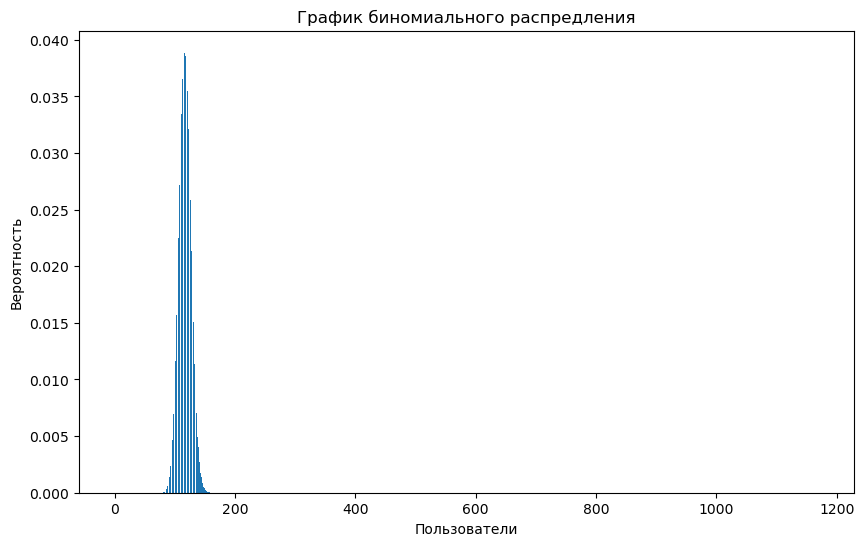

In [64]:
# Создаем пустой список, для построения графика распределения
distribution = []

# Создаем цикл для перебора значение от 0 до 1170 + 1
# и добавляем в список вероятность каждого значения
for k in range(0, 1171):
    value = st.binom.pmf(k, 1170, 0.1)
    distribution.append(value)
    
# Количество пользователей
x = 100

# Выводим вероятность получить значение меньше этого
print(st.binom(1170, 0.1).cdf(x))


# Строим график биноминального распределения
plt.figure(figsize=(10,6))
plt.bar(range(0, 1171), distribution)
plt.xlabel('Пользователи')
plt.ylabel('Вероятность')
plt.title('График биномиального распредления')
plt.show()

Для того, чтобы 100 клиентов продлили подписку и вероятность не выполнить план была примерно 5% необходимо отправить 1170 промокодов.

## Задание 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 
399,5 тыс. пользователей.

**Ответ**

Данное событие тоже описывается биноминальным распределением, так как имеет два исхода:
- Пользователь открыл уведомление
- Пользователь не открыл уведоление

Но так, как считать каждое отдельное значение долго, аппроксимируем биноминальное распределение нормальным распределением. Так как наша n достаточно велика, а именно `1000000`, а значит аппроксимация нормальным распределением должна сработать. 

Сначала нам необходимо посчитать мат.ожиданние и СКО биноминального расспределение, после воспользуемся методом `st.norm` для того, чтобы задать нормальное распределение и потом с помощью метода `cdf` найдем вероятность получить значение меньше `395000`

In [65]:
# Задаём параметры биномиального распределения
n = 1000000
p = 0.4

# Зададим МО и СКО нормального распределения равными
# МО и СКО биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# Задаём нормальное распределение
distr = st.norm(mu, sigma) 

# Считаем вероятность получить значение 399500
distr.cdf(399500)

0.15371708296369768

В результате вероястность того, что уведомление откроют не более 399500 пользователей равна 15%, а значит уведомления увидят большее количество пользователей, что хорошо.

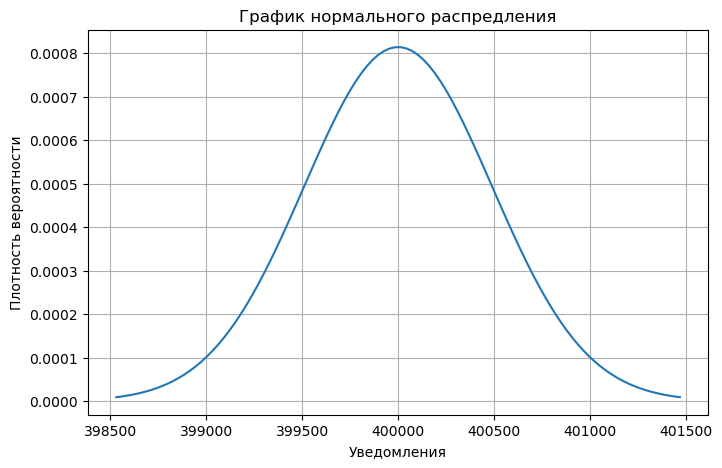

In [66]:
# Задаем границы
left = int(n * p - 3 * sqrt(n * p * (1 - p)))
right = int(n * p + 3 * sqrt(n * p * (1 - p)))

# Вызываем функцию для построения оси x 
x = linspace(left, right, 100)

# Строим график распределения
plt.figure(figsize=(8,5))
plt.plot(x, st.norm.pdf(x, mu, sigma))
plt.grid()
plt.xlabel('Уведомления')
plt.ylabel('Плотность вероятности')
plt.title('График нормального распредления')
plt.show()

# Общий вывод

Данные были получены из трёх файлов:
- `users_go.csv`
- `rides_go.csv`
- `subscriptions_go.csv`

В дальнейшем эти датасеты объединили в один под названием `information_users`

Сначала был сделан обзор данных. Само исследование проходило в четыре этапа:
- Изучить данные;
- Предобработка данных;
- Исследовательский анализ данных;
- Проверка гипотез.

**1. Обзор данных**

- В таблице `users` 5 столбцов, тип данных - `int`(2), `object`(3). Название столбцов соотвествует стилю. Количестов значений в столбцах одинаковое, а значит пропусков нет;
- В таблице `rides`  4 столбца, тип данных - `int`(1), `object`(1) и `float`(2). Название столбцов соотвествует стилю. Количестов значений в столбцах одинаковое, а значит пропусков нет;
- В таблице `subscriptions` 4 столбца, тип данных - `int`(3) и `object`(1). Название столбцов соотвествует стилю. Количестов значений в столбцах одинаковое, а значит пропусков нет.

**2. Предобработка данных**

Проверили типы данных в датафреймах и поменяли их, где было необходимо:
- Изменили тип данных в столбце `date` датасета `rides` с `object` на `datetime`.

Создали новый столбец `month`, в котором хранится номер месяца.

Узнали, что данные в нашем распорежение только за 2021 год.

Изучили дубликаты в датафреймах:
- В таблице `users` были удалены явные дубликаты в количестве 31;
- По работали с неявными дубликатами в столбце `name` таблицы `users` и заменили в именах букву ё на е;
- Также в столбце `name` были заменены неявные дубликаты:
    - Заменили Влад на Владислав
    - Заменили Влада на Владислава
    - Заменили Наташа на Наталию
- Проверили столбец `city` на неявные дубликаты - не обнаружены

**3. Исследовательский анализ данных**

1. Изучили и визуализировали при помощи гистограммы частоту встречаемости городов. В результате самый частый город - `Пятигорск`, наименее частый - `Москва`

2. Изучили и визуализировали при помощи круговой диаграммы соотношение пользователей с подпиской и без подписки. В результате, получается, что людей без подписок больше, а именно их 835 против 699 с подпиской или же 54% против 45%.

3. Изучили и визуализировали возраст пользователей. В результате выяснили, что больше всего самокаты используют пользователи 25-ти лет. Также можно сказать, что люди от 20 до 30 лет являются основными пользователями аренды самокатов. Меньше всего пользуются аудитория до 18 лет и от 35 и выше.

4. Изучили и визуализировали расстояние, которое пользователь преодолел за одну поездку. В результате было найдено аномальное значение в котором пользователь проехал 85см причины появления такого значения разные от технических до проблем у самого пользователя. Также выяснили, что медианное расстояние 3133 метров, и что есть пользователи, которые преодолевают небольшое расстояние, так как такие значения возможны, например, пользователь взял самокат, чтобы доехать до остановки.

5. Изучили и визуализировали расстояние продолжительность поездок. В результате выяснили, что обычно пользователи тратят 17.7 минут на одну поездку. Также есть большие значения, которые не будут считаться аномальными, так как пользователи в принципе могли взять в аренду самокат на больше чем 35 минут или меньше 5 минут. Но также были найдены аномальные значение в виде поездки, длившийся 5 секунд при большом пройденном расстоянии. Удалять данные значения не будем, но стоит взять их на вооружение и уточнить. Они могли появится из-за какого-то технического сбоя, либо время записанно в каких-то других единицах, либо пользователи как-то обходят с помощью стороннего софта, чтобы платить меньше.

6. Объединили все три датафрейма в один под названием `information_users`

7. Создали еще два датафрейма:
    - c данными о пользователях без подписки под названием `users_free`;
    - с данными о пользователях с подпиской под названием `users_ultra`.

8. Изучили и визуализировали информацию о расстоянии и времени поездок для пользователей обеих категорий:В результате исследования можно сделать следующие выводы: 
    - Пользователей без подписки больше, чем пользователей с подпиской.
    - Пользователи с подпиской обычно проезжают расстояния примено от 2800м до 3500м. А пользователи без подписки проезжают короткие расстояния, а также расстояния от 3500м и более.
    - Также можно сказать, что пользователи с подпиской обычно берут самокаты для средних по расстоянию поездок
    - В целом пользователи с подпиской тратят столько же времени как и пользователи без подписки.
    - У пользователей с подпиской поездок дольше 35 минут больше. А у пользователей без подписки количество коротких заездов больше.

9. Дальше приступили к расчету выручки:
    - Создали агрегированный датафрейм по двум категориям пользователей, в которых хранилось суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц и назвали его: `agg_rides_users`. В этот датафрейм также был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. Выручка была посчитана по формуле в зависимости от подписки пользователя.

**4. Проверка гипотез**

Необходимо было проверить 3 гипотезы:

1. Тратят ли пользователи с подпиской больше времени на поездки?
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Для проверки отвергаем мы или не отвергаем нулевую гипотезу, была написана функция `ttest`, которая принмает одно значение результат проверки гипотезы.

При проверки первой гипотезы были сформулированы нулевая гипотеза (`H0`) - в среднем пользователи с подпиской тратят столько же времени на поездки, как и пользователи без нее. А также альтернативная (`H1`) - в среднем пользователи с подпиской тратят больше времени на поездки, чем пользователи без нее.

В результате мы отвергли нулевую гипотезу. И предположили, что есть основания, что пользователи с подпиской трататят больше времени на поездки. 


Для проверки второй гипотезы были сформулированны следующие `H0` и `H1`: 

`H0` - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равняется 3130 метров.

`H1` - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров.

- H0: μ = 3130
- H1: μ < 3130

В результате мы не отвергли нулевую гипотезу и можно сказать, что растояние, которое проезжают пользователи в среднем не превышает значение 3130 метров

В результате проверки третьей гипотезы, сформировали нуелвую и альтернативную гипотезу:
- HO - в среднем помесячная выручка от пользователей с подпиской по месяцам такая же как и у пользователей без нее
- H1 - в среднем помесячная выручка от пользователей с подпиской по месяцам выше чем у пользователей без нее

В результате мы отврегаем нулевую гипотезу в пользу альтернативной. Значит можно сделать вывод, что выручка с пользователей с подпиской выше.

**Вывод**

Можно предположить, что пользователи с подпиской больше пользуются приложением и проезжают около 3км, но самих таких пользователей меньше. Также скорее всего выручка с таких пользователей выше.

При увелечении пользователей с подпиской необходимо чаще менять самокаты из-за их износа, либо же увеличить их срок жизни, но при этом выручка станет благодаря этому больше.